# Multiple Linear Regression

problem statement:

Build a predictive linear regression model for given dataset, given temperature, humidity, wind speed , wind bearing, visibility, pressure  predict apparent temperature
https://drive.google.com/open?id=1WsJxbsh51SL1UhT0xEvNynZTKy4nOwLM

In [1]:
#importing necessary library
#importing matplotlib 
import matplotlib.pyplot as plt
#importing pandas 
import pandas as pd
import seaborn as sea
#importing numpy
import numpy as np
#importing math module
import math
# loading csv data from the file given in the url
weather_data = pd.read_csv("weatherHistory.csv")
#printing top 5 values of data
weather_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [2]:
#printing info about data
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [3]:
#checking for null values
weather_data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [4]:
#filling null values in data set with mode
weather_data['Precip Type'] = weather_data.fillna(weather_data['Precip Type'].mode())
#checking for null values again after filling
weather_data.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [5]:
#checking for columns present in data set
weather_data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [6]:
#dropping unnecessary columns
weather_data.drop(['Summary','Precip Type','Daily Summary','Loud Cover','Formatted Date'], axis = 1, inplace = True)

In [7]:
#checking after dropping columns
weather_data.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [8]:
#seperating all clumns
temp_w_s = weather_data['Wind Speed (km/h)']
temp_hum = weather_data['Humidity']
temp_pre = weather_data['Pressure (millibars)']
temp_vis = weather_data['Visibility (km)']
temp_t   = weather_data['Temperature (C)']
temp_w_b = weather_data['Wind Bearing (degrees)']
temp_a_t = weather_data['Apparent Temperature (C)']

plotting different graphs

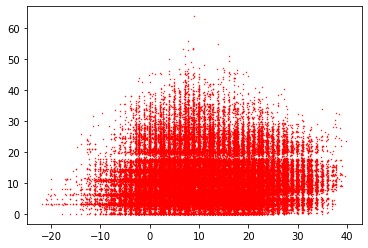

In [9]:
#plotting graph of wind speed v/s temperature
plt.scatter(temp_t,temp_w_s,color='r',s=0.2)

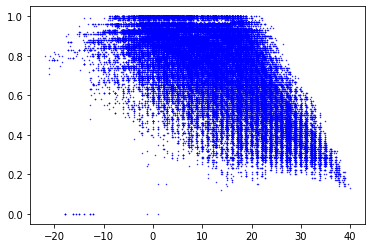

In [10]:
#plotting graph of humidity v/s temperature
plt.scatter(temp_t,temp_hum,color='b',s=0.2)

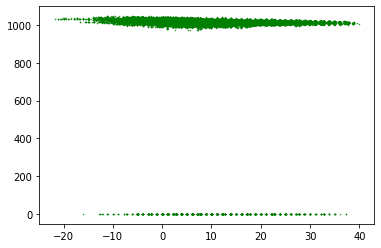

In [11]:
#plotting graph of temp pressure v/s temperature
plt.scatter(temp_t,temp_pre,color='g',s=0.2)

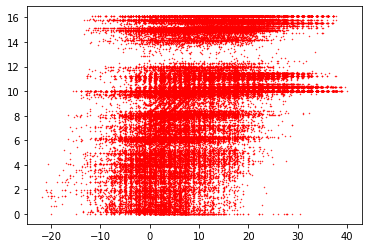

In [12]:
#plotting graph of visiblity v/s temperature
plt.scatter(temp_t,temp_vis,color='r',s=0.2)

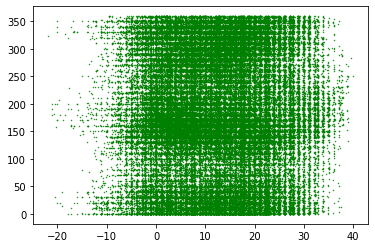

In [13]:
#plotting graph of wind bearing v/s temperature
plt.scatter(temp_t,temp_w_b,color='g',s=0.2)

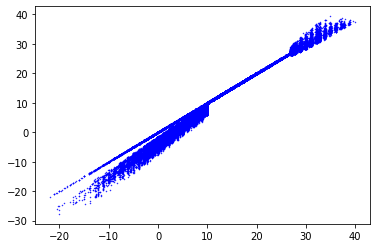

In [14]:
#plotting graph of apparent temperature v/s temperature
plt.scatter(temp_t,temp_a_t,color='b',s=0.2)

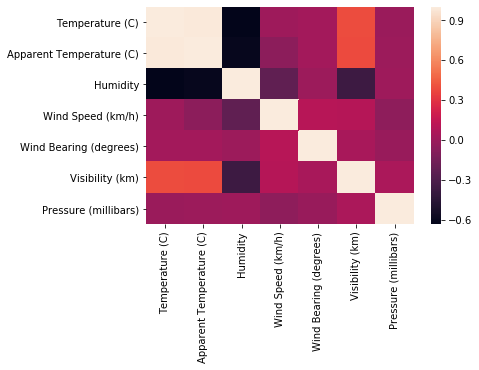

In [15]:
#plotting heatmap
sea.heatmap(weather_data.corr())

### seperating dataset into train and test data

In [16]:
#seperating train and test data
x_train, y_train, x_test, y_test = (weather_data.iloc[:70000,1:], weather_data.iloc[:70000,0], weather_data.iloc[70000:,1:], weather_data.iloc[70000:,0])

In [17]:
#obtaining value of theta 
theta = np.dot(np.linalg.inv(np.dot(x_train.T, x_train)),  np.dot(x_train.T, y_train))

In [18]:
theta

array([ 8.84058725e-01, -5.67098682e-01,  9.53911669e-02, -1.62266930e-04,
        2.18801478e-02,  1.50713513e-03])

In [19]:
#confirming the shape of theta array
theta.shape

(6,)

In [20]:
#obtaining predicted value of temp
pred_temp = x_test.dot(theta)

In [21]:
pred_temp

70000    13.172723
70001    12.957009
70002    12.977223
70003    12.810349
70004    12.408586
           ...    
96448    25.681376
96449    24.290879
96450    21.901211
96451    21.571260
96452    20.148565
Length: 26453, dtype: float64

Text(0.5, 0, 'Y_test')

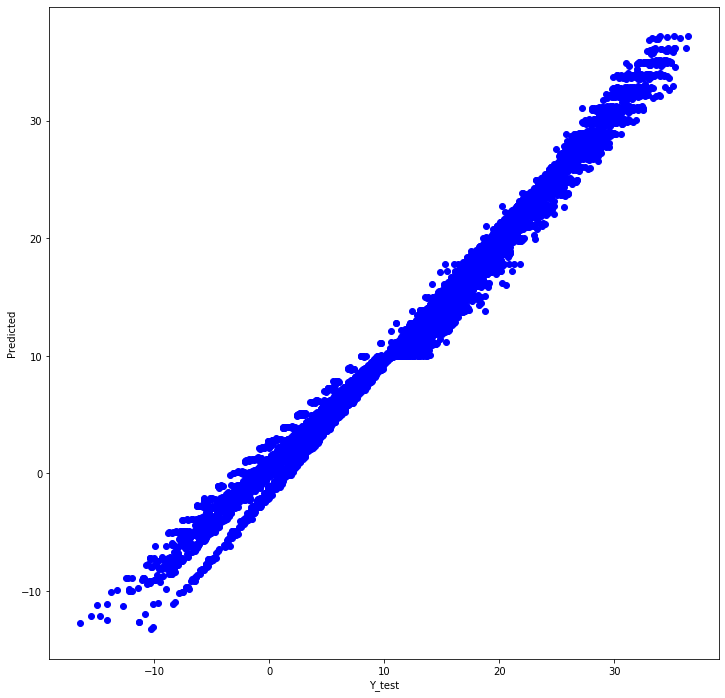

In [22]:
plt.figure(figsize = (12,12))
plt.scatter(pred_temp,y_test,  c = 'b')
plt.ylabel('Predicted')
plt.xlabel('Y_test')

In [23]:
rmse = np.sqrt(sum([val**2 for val in (pred_temp.values - y_test.values)]) / len(y_test))
print('Root mean squared error is : {}'.format(rmse))

Root mean squared error is : 0.9319802201377496


In [24]:
#displaying top values of train data
x_train.head()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [25]:
#defining prediction function
def predict(val):
    res = np.array(val).dot(theta)
    return res

In [26]:
#predicting temperature by giving dummy values
predict(np.array([ 9.1036, 0.83, 16.41, 269.0, 15.826,1000]))

10.952554694265674

# gradient descent

In [27]:
#seperating values from data set and takig it in np array to faster the calculation
win_speed = x_train['Wind Speed (km/h)'].values
win_bearing = x_train['Wind Bearing (degrees)'].values
humidity = x_train['Humidity'].values
pressure = x_train['Pressure (millibars)'].values
visibility = x_train['Visibility (km)'].values
temperature = y_train.values
app_temperature = x_train['Apparent Temperature (C)'].values

In [28]:
m = len(x_train)
X = np.array([win_speed, humidity, pressure, win_bearing, visibility, temperature]).T
Y = np.array(app_temperature)

In [29]:
alpha = 0.000001   
m = len(X) 
np.random.seed(10)
theta = np.random.rand(6)

In [30]:
def gradient_descent(x, y, m, theta, alpha):
    cost_list = []   #to record all cost values to this list
    prediction_list = []
    iterations = 10000
    for i in range(iterations):
        pred = np.dot(x, theta)   #predicted y values theta_0*x0+theta_1*x1
        prediction_list.append(pred)
        error = pred - y
        cost = 1/(2*m) * np.dot(error.T, error)   #  (1/2m)*sum[(error)^2]
        cost_list.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))   # alpha * (1/m) * sum[error*x]

    return prediction_list, cost_list, theta

In [31]:
prediction_list, cost_list, theta_list = gradient_descent(X, Y, m, theta, alpha)

In [32]:
print(cost_list[-1]) #the least value of cost fuction

14.638694246287175


In [47]:
#Values from the training set
win_speed_t = x_test['Wind Speed (km/h)'].values
win_bearing_t = x_test['Wind Bearing (degrees)'].values
humidity_t = x_test['Humidity'].values
pressure_t = x_test['Pressure (millibars)'].values
visibility_t = x_test['Visibility (km)'].values
temperature_t = y_test.values
app_temperature_t = x_test['Apparent Temperature (C)'].values

In [48]:
def predict(test):
    t = np.reshape(theta_list, (6,1))
    res = np.dot(test, t)
    return res

In [49]:
#converted into numpy array for faster processing
test = np.array([win_speed_t, humidity_t, pressure_t, win_bearing_t, visibility_t, temperature_t]).T

In [50]:
theta_list

array([ 0.4115803 ,  0.01576361, -0.00598695, -0.00464077,  0.47334354,
        0.7132533 ])

In [51]:
res = predict(test)

In [52]:

res[:10]

array([[ 9.85571129],
       [ 9.60595247],
       [10.05000156],
       [ 9.4887445 ],
       [ 8.07644271],
       [ 5.53917673],
       [10.05838549],
       [ 5.52875925],
       [15.3485682 ],
       [12.74648566]])

In [62]:
y_test[:10]

70000    12.300000
70001    12.205556
70002    12.300000
70003    12.250000
70004    12.166667
70005    11.183333
70006    11.161111
70007    11.183333
70008    15.411111
70009    14.322222
Name: Temperature (C), dtype: float64

In [66]:
sum_val=0
for index in range(len(res)):
    val=res[index]-y_test.iloc[index]
    sum_val=sum_val+(val**2)

rmse = np.sqrt(sum_val/len(res))
print('Root mean squared error is : {}'.format(rmse))
    

Root mean squared error is : [3.97727565]


In [ ]:
#new line